Geothermal machine learning analysis: Utah 
---

This notebook is a part of the GeoThermalCloud.jl: Machine Learning framework for Geothermal Exploration.

<div style="text-align: left; padding-bottom: 30px;">
    <img src="../../logos/geothermalcloud-small.png" alt="geothermalcloud" width=25%  max-width=125px;/>
</div>


## GeoThermalCloud installation

If **GeoThermalCloud** is not installed, first execute in the Julia REPL `import Pkg; Pkg.add("GeoThermalCloud"); import Pkg; Pkg.add("NMFk"); Pkg.add("Mads"); Pkg.add("DelimitedFiles"); Pkg.add("JLD"); Pkg.add("Gadfly"); Pkg.add("Cairo"); Pkg.add("Fontconfig"); Pkg.add("Kriging"); Pkg.add("GMT");`.

In [1]:
import NMFk
import Mads
import DelimitedFiles
import JLD
import Gadfly
import Cairo
import Fontconfig
import Kriging
import GMT

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-12202957658491970990\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-14571943187360507422\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-12202957658491970990\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [27]:
Xdat, headers = DelimitedFiles.readdlm("data/utah_geothermal_data.csv", ',', header=true)

In [30]:
xcoord = Array{Float32}(Xdat[:, 2])
ycoord = Array{Float32}(Xdat[:, 1]);

### Let's plot coordinates in spatial map

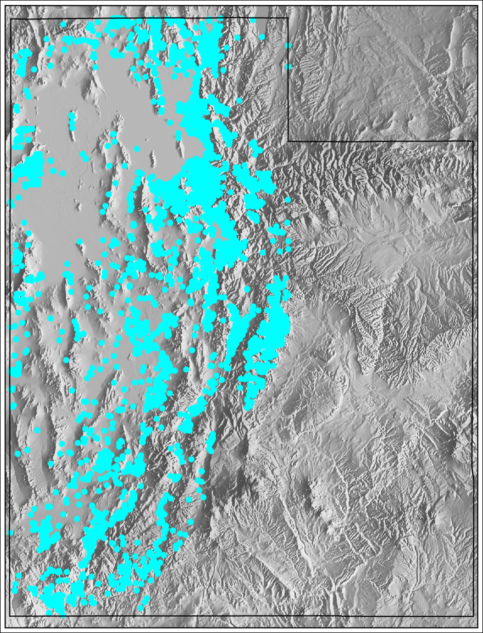

┌ Warning: In Jupyter you can only visualize png files. File maps/locations.png was saved in disk though.
└ @ GMT /Users/bulbulahmmed/.julia/packages/GMT/Yrxaq/src/common_options.jl:3256


In [66]:
GMT.grdimage("maps/utah.nc", proj=:Mercator, shade=(azimuth=100, norm="e0.8"),
	color=GMT.makecpt(color=:grayC, transparency=10, range=(0,5000,500), continuous=true),
	figsize=8, conf=(MAP_FRAME_TYPE="plain", MAP_GRID_PEN_PRIMARY="thinnest,gray,.",
	MAP_GRID_CROSS_SIZE_SECONDARY=0.1, MAP_FRAME_PEN=0.5, MAP_TICK_PEN_PRIMARY=0.1,
	MAP_TICK_LENGTH_PRIMARY=0.01), frame=(axis="lrtb"))
GMT.plot!(xcoord, ycoord, fill=:cyan, marker=:c, markersize=0.1, coast=(proj=:Mercator, 
    DCW=(country="US.UT", pen=(0.5,:black))),
    fmt=:png, savefig="maps/locations", show=true);
Mads.display("maps/locations.png")

### Define attributes
- we can use attributes from headers; however, they are short
- for better understanding the variable names in the plot, we are redefining them again

In [36]:
attributes = ["Temperature", "Quartz", "Chalcedony", "pH", "TDS", "Al", "B", "Ba", "Be", "Br", "Ca", "Cl", "HCO3", "K", "Li", "Mg", "Na", "δO18"]
attributes_long = ["Temperature (C)", "GTM quartz (C)", "GTM chalcedony (C)", "pH ()", "TDS (ppm)", "Al (ppm)", "B (ppm)", "Ba (ppm)", "Be (ppm)", "Br (ppm)", "Ca (ppm)", "Cl (ppm)", "HCO3 (ppm)", "K (ppm)", "Li (ppm)", "Mg (ppm)", "Na (ppm)", "δO18 (‰)"];

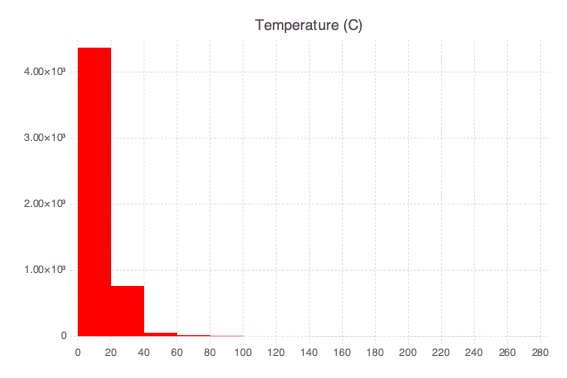

┌ Info: Temperature (C)
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:54


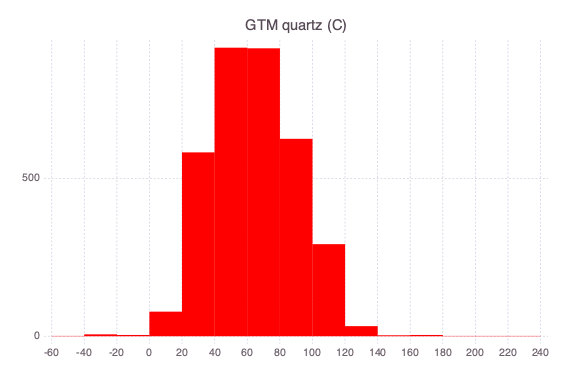

Temperature (C): Min 0.1 Max 261.0 StdDev 9.497179 Skewness 10.095466 Count 5214


┌ Info: GTM quartz (C)
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:54


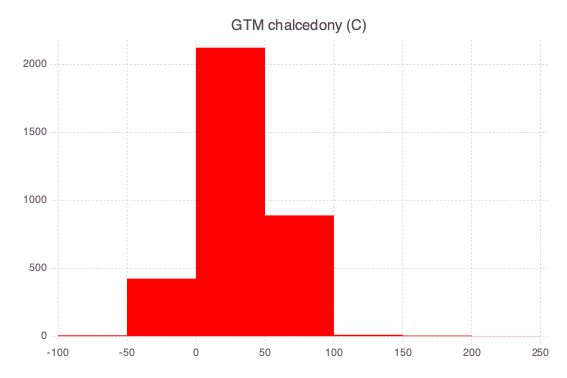

GTM quartz (C): Min -50.870045 Max 222.28357 StdDev 26.329222 Skewness 0.24256101 Count 3460


┌ Info: GTM chalcedony (C)
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:54


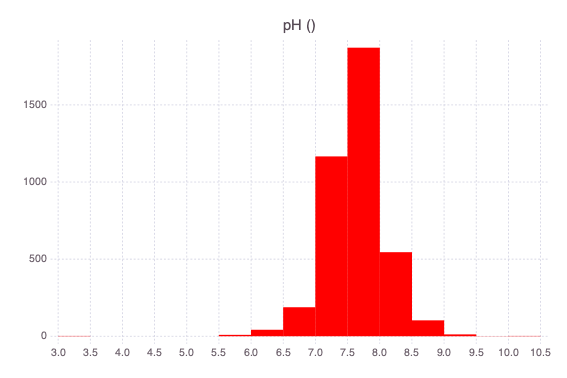

GTM chalcedony (C): Min -81.64773 Max 208.67426 StdDev 27.450817 Skewness 0.3369881 Count 3460


┌ Info: pH ()
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:54


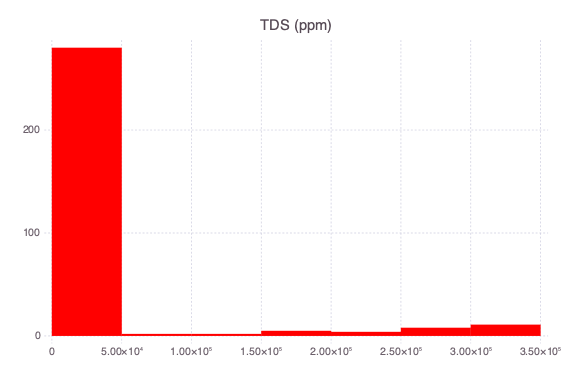

pH (): Min 3.4 Max 10.2 StdDev 0.44822767 Skewness -0.45681924 Count 3941


┌ Info: TDS (ppm)
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:54


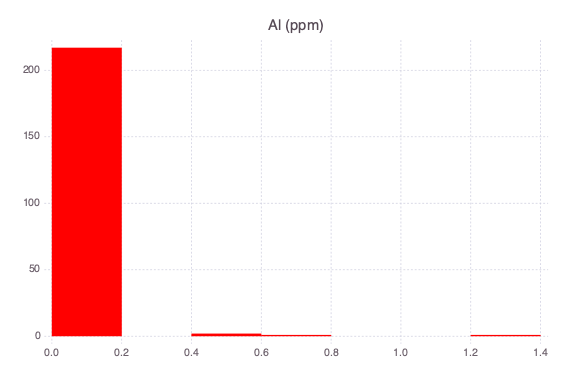

TDS (ppm): Min 122.0 Max 329000.0 StdDev 78777.95 Skewness 2.9479313 Count 312


┌ Info: Al (ppm)
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:54


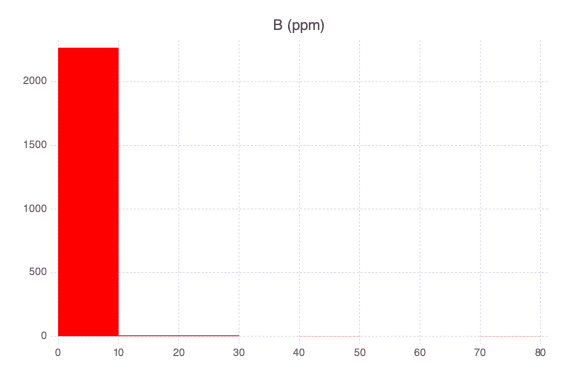

Al (ppm): Min 0.0 Max 1.251 StdDev 0.10527698 Skewness 9.031239 Count 221


┌ Info: B (ppm)
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:54


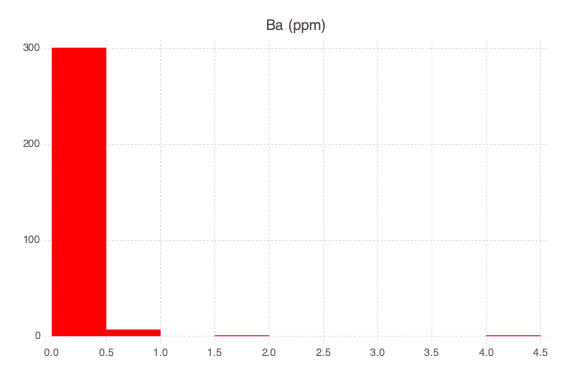

B (ppm): Min 0.0 Max 76.5 StdDev 2.6950865 Skewness 15.190172 Count 2284


┌ Info: Ba (ppm)
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:54


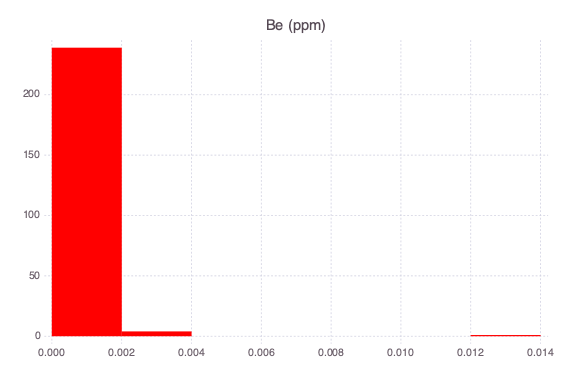

Ba (ppm): Min 0.002 Max 4.5 StdDev 0.2898333 Skewness 11.825817 Count 310


┌ Info: Be (ppm)
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:54


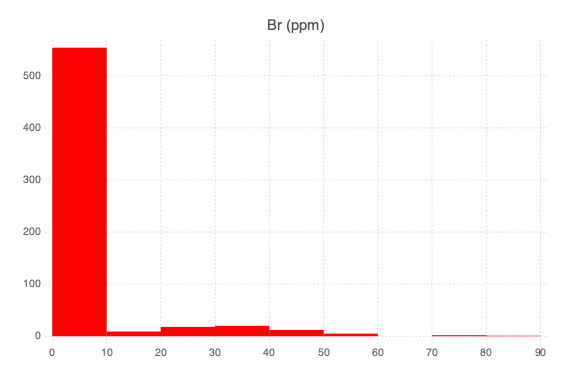

Be (ppm): Min 5.3333333e-5 Max 0.013 StdDev 0.00089295243 Skewness 10.968073 Count 244


┌ Info: Br (ppm)
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:54


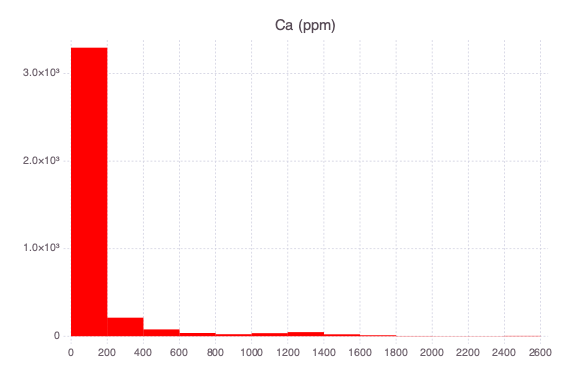

Br (ppm): Min 0.0 Max 84.0 StdDev 11.680384 Skewness 3.435088 Count 621


┌ Info: Ca (ppm)
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:54


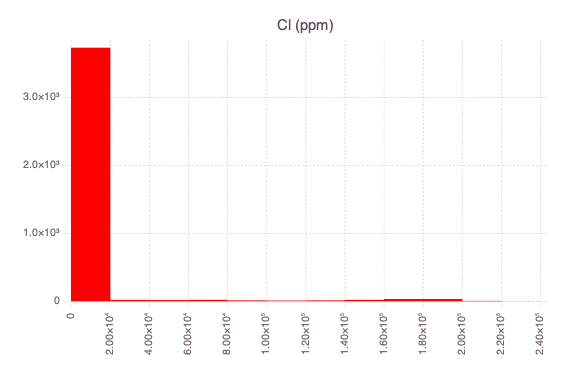

Ca (ppm): Min 0.6 Max 2566.6667 StdDev 262.82578 Skewness 4.424904 Count 3772


┌ Info: Cl (ppm)
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:54


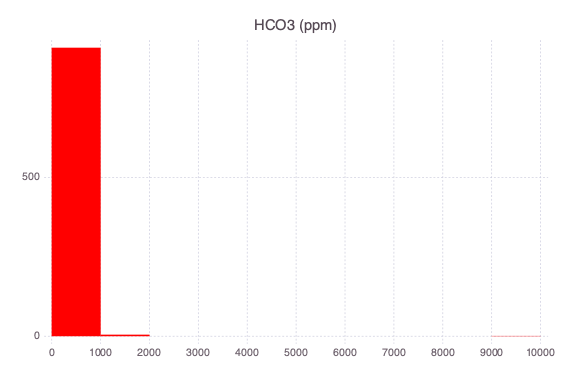

Cl (ppm): Min 0.6 Max 240000.0 StdDev 28681.555 Skewness 5.21565 Count 3923


┌ Info: HCO3 (ppm)
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:54


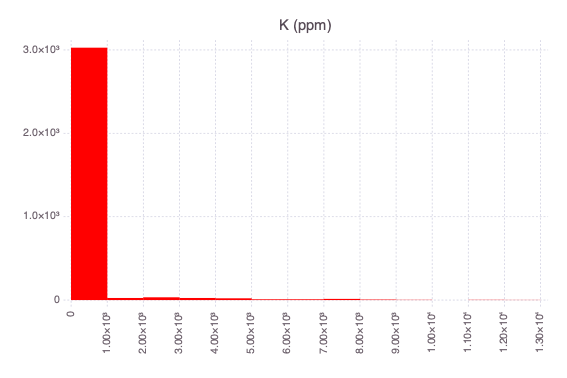

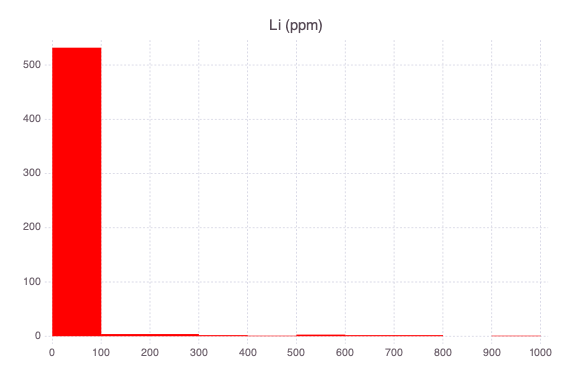

HCO3 (ppm): Min 37.0 Max 9217.0 StdDev 329.8163 Skewness 22.165213 Count 915
K (ppm): Min 0.0 Max 13000.0 StdDev 1063.7937 Skewness 6.380783 Count 3177


┌ Info: K (ppm)
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:54
┌ Info: Li (ppm)
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:54


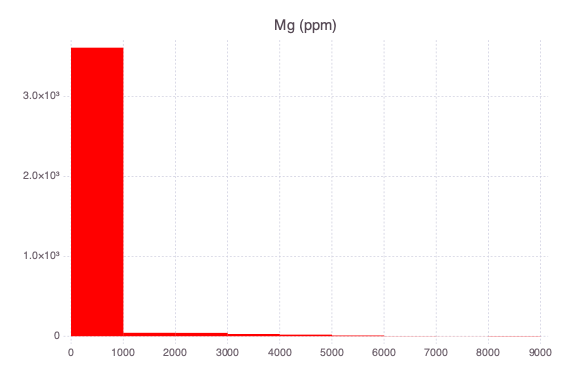

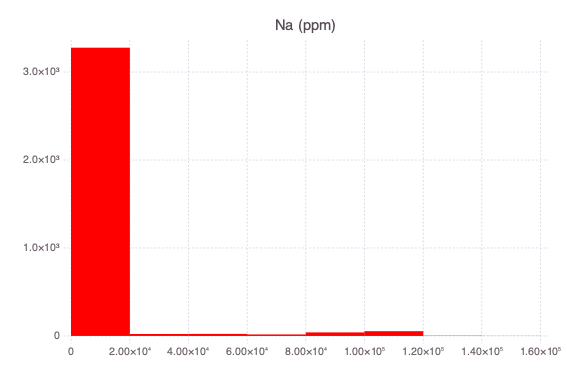

Li (ppm): Min 0.0 Max 970.0 StdDev 90.79041 Skewness 6.6990304 Count 551
Mg (ppm): Min 0.0 Max 8500.0 StdDev 663.7361 Skewness 6.581147 Count 3760


┌ Info: Mg (ppm)
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:54
┌ Info: Na (ppm)
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:54


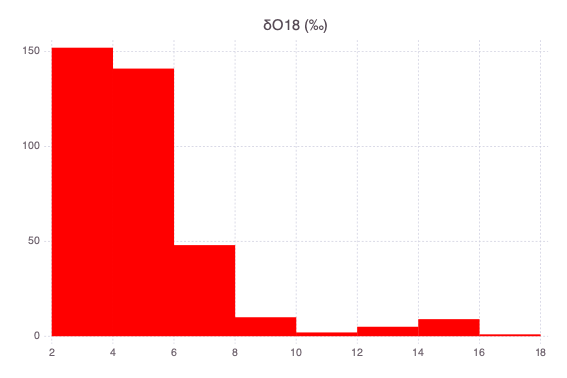

Na (ppm): Min 0.5 Max 160000.0 StdDev 17983.25 Skewness 4.946034 Count 3437
δO18 (‰): Min 2.1499996 Max 16.36 StdDev 2.4535506 Skewness 2.5710073 Count 368
Name Min Max StdDev Count (non-NaN's)
Temperature (C) 0.1 261.0 9.497179 10.095466 5214
GTM quartz (C) -50.870045 222.28357 26.329222 0.24256101 3460
GTM chalcedony (C) -81.64773 208.67426 27.450817 0.3369881 3460
pH () 3.4 10.2 0.44822767 -0.45681924 3941
TDS (ppm) 122.0 329000.0 78777.95 2.9479313 312
Al (ppm) 0.0 1.251 0.10527698 9.031239 221
B (ppm) 0.0 76.5 2.6950865 15.190172 2284
Ba (ppm) 0.002 4.5 0.2898333 11.825817 310
Be (ppm) 5.3333333e-5 0.013 0.00089295243 10.968073 244
Br (ppm) 0.0 84.0 11.680384 3.435088 621
Ca (ppm) 0.6 2566.6667 262.82578 4.424904 3772
Cl (ppm) 0.6 240000.0 28681.555 5.21565 3923
HCO3 (ppm) 37.0 9217.0 329.8163 22.165213 915
K (ppm) 0.0 13000.0 1063.7937 6.380783 3177
Li (ppm) 0.0 970.0 90.79041 6.6990304 551
Mg (ppm) 0.0 8500.0 663.7361 6.581147 3760
Na (ppm) 0.5 160000.0 17983.25 4.946034 3437
δO

┌ Info: δO18 (‰)
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:54
┌ Info: Attributes
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:70


In [34]:
Xdat[Xdat .== ""] .= NaN
X = convert.(Float32, Xdat[:,3:end])
X[:,16] .= abs.(X[:,16])
X[:,18] .+= 20 # rescale δO18 data (‰)

nattributes = length(attributes_long)
npoints = size(Xdat, 1)

NMFk.datanalytics(X, attributes_long; dims=2);

Data for `TDS`, `Al`, and `δO18` are heavily missing.

Even though the dataset is very sparse, our ML methods can analyze the inputs.

Most of the commonly used ML methods cannot process datasets that are sparse.

Furthermore, different attributes in the Great Basin dataset cover different areas.

This is demonstrated in the maps generated below.

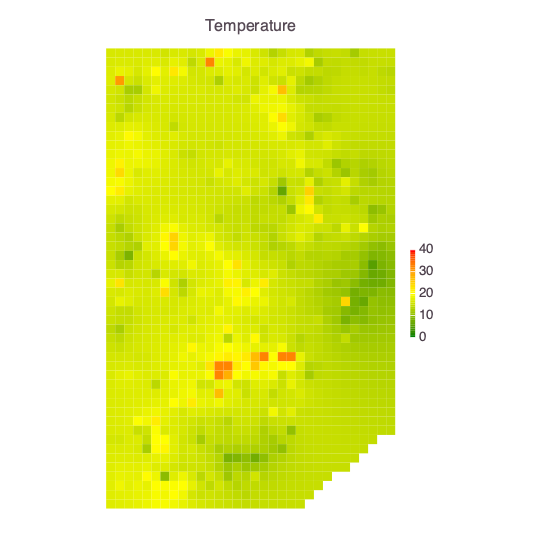

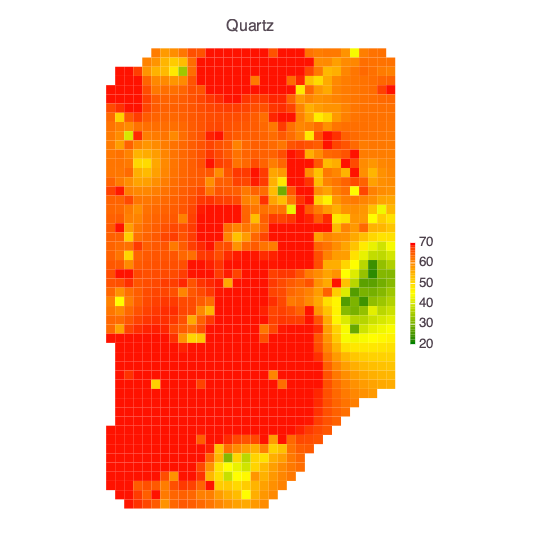

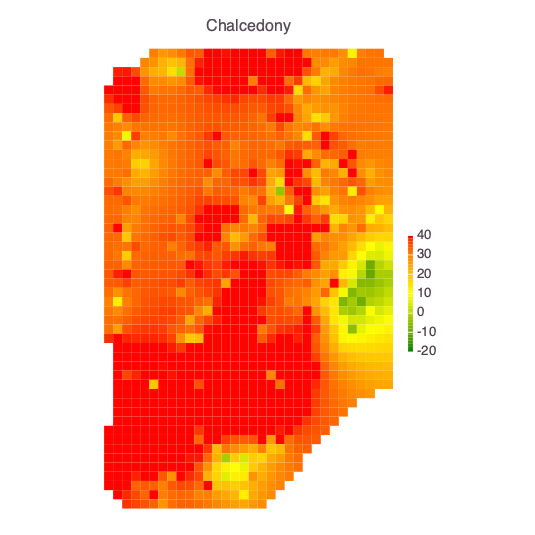

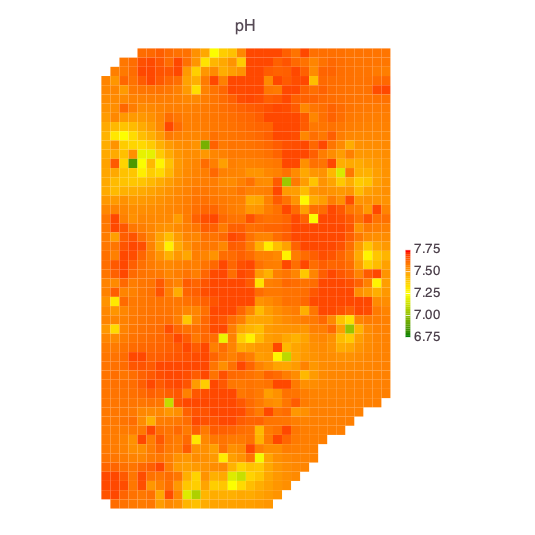

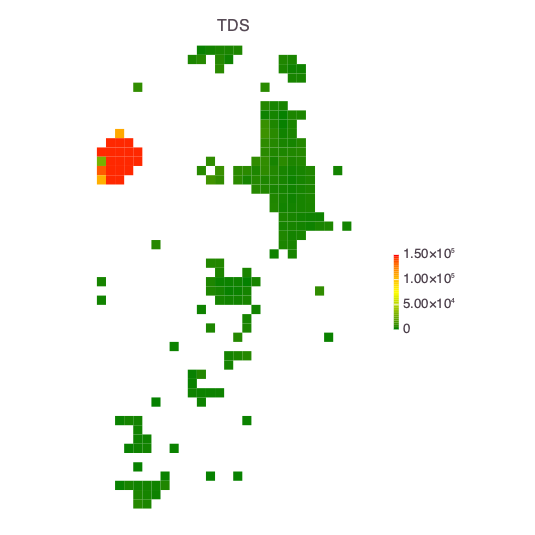

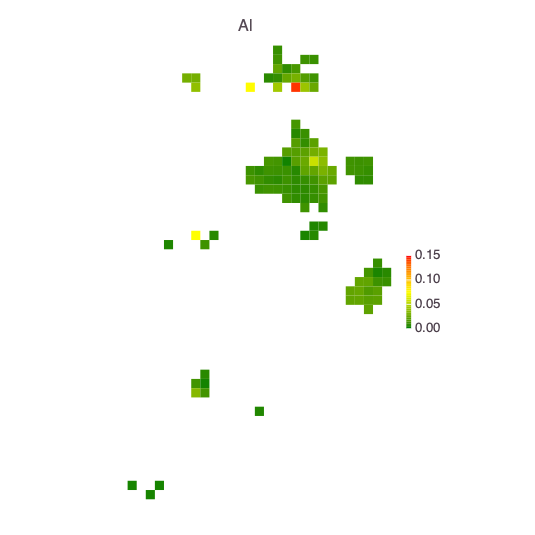

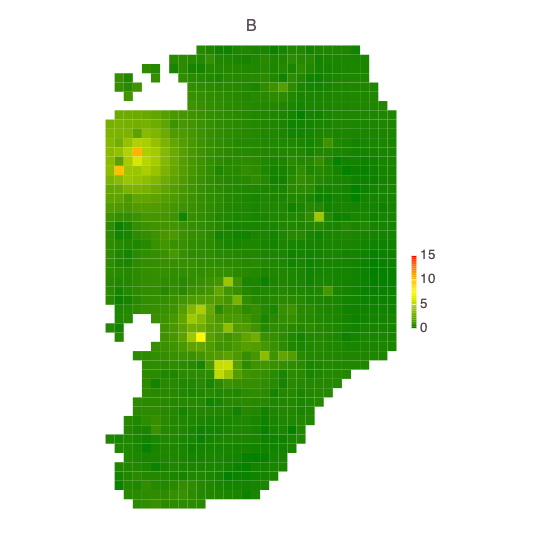

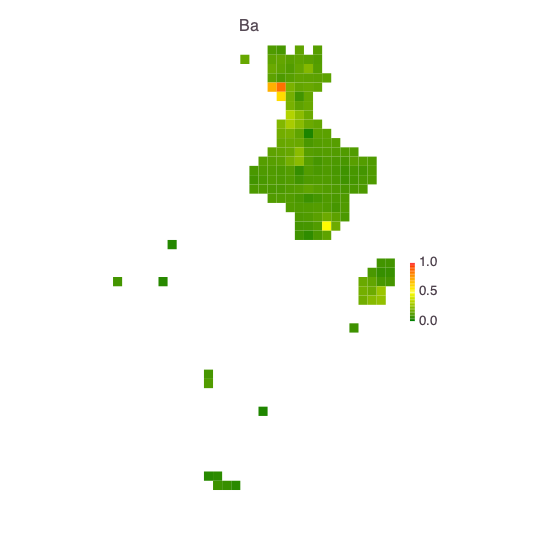

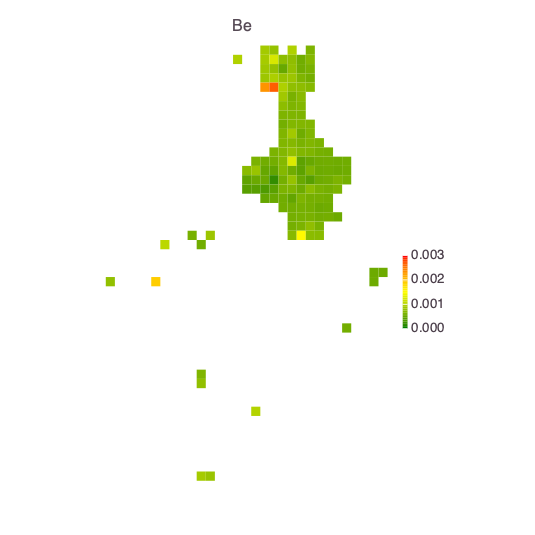

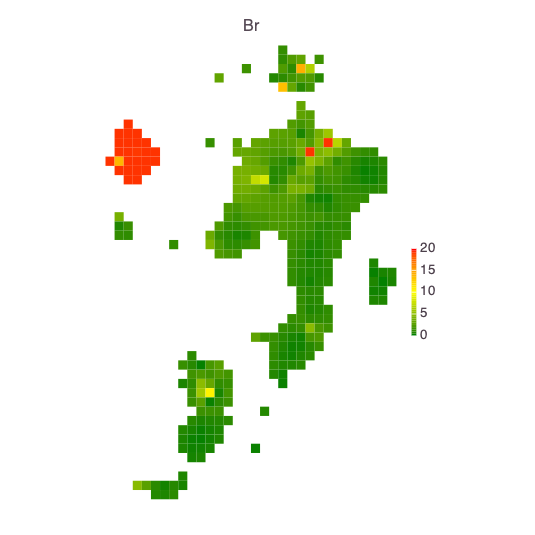

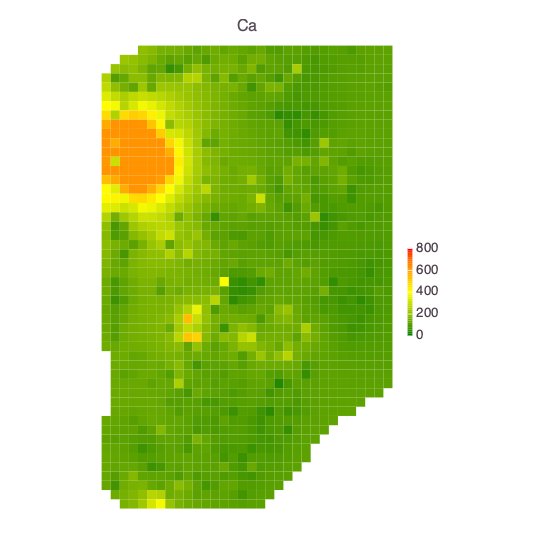

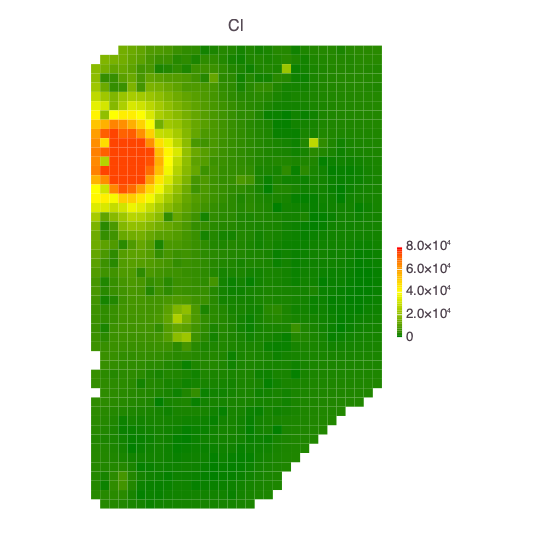

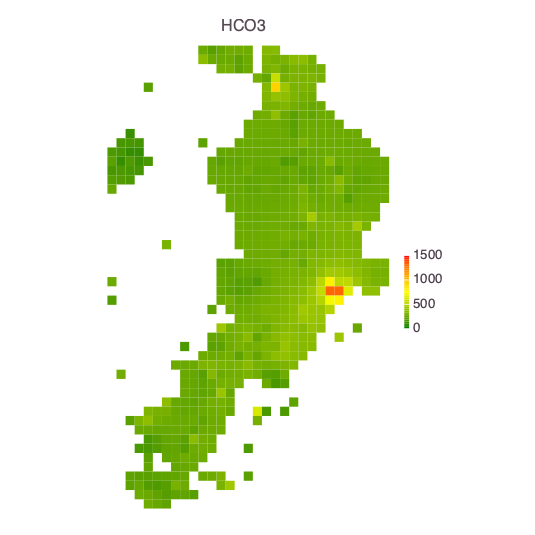

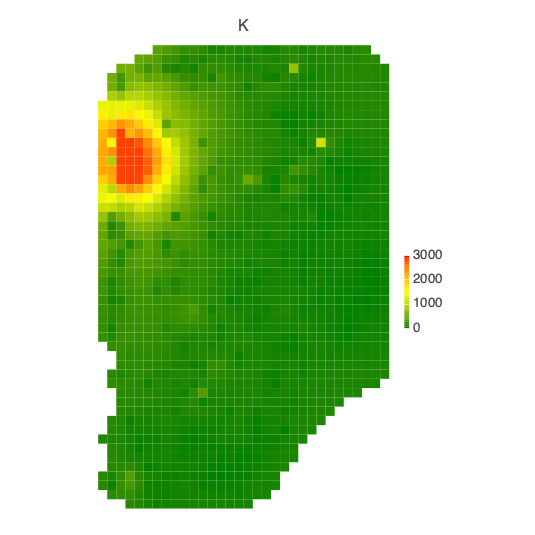

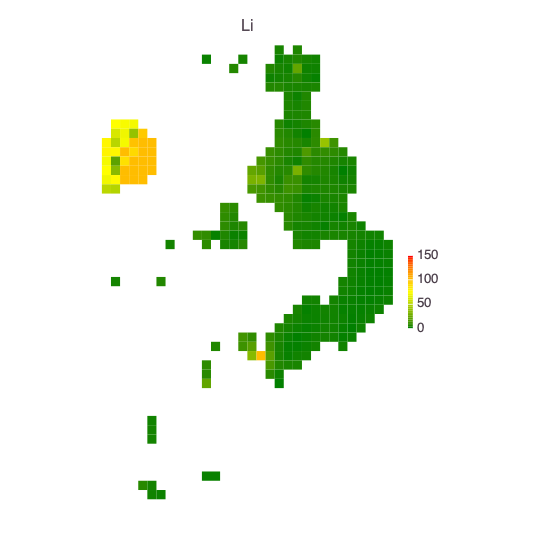

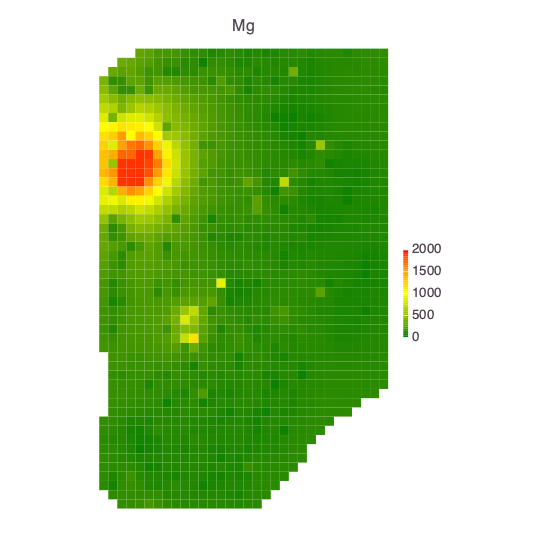

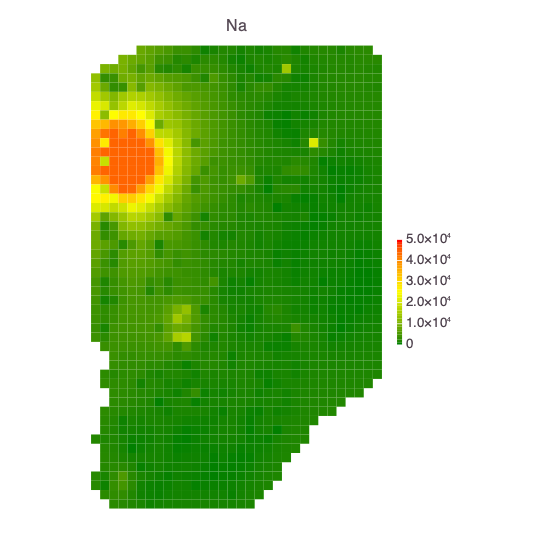

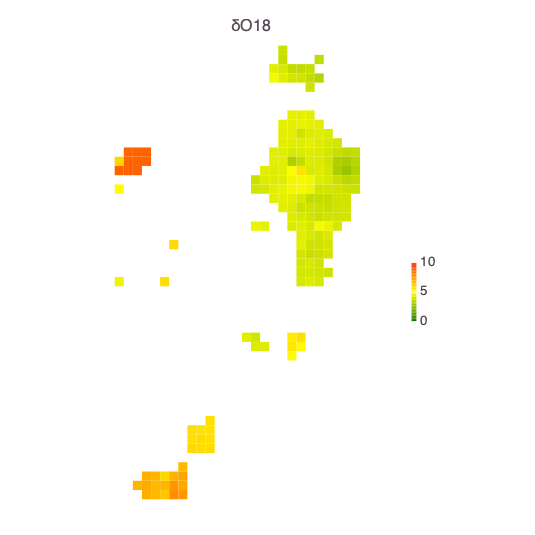

In [37]:
coord = permutedims([xcoord ycoord])

xgrid, ygrid = NMFk.griddata(xcoord, ycoord; stepvalue=0.1)

for i = 1:nattributes
	inversedistancefield = Array{Float64}(undef, length(xgrid), length(ygrid))
	v = X[:,i]
	iz = .!isnan.(v)
	icoord = coord[:,iz]
	v = v[iz]
	for (i, x) in enumerate(xgrid), (j, y) in enumerate(ygrid)
		inversedistancefield[i, j] = Kriging.inversedistance(permutedims([x y]), icoord, v, 2; cutoff=1000)[1]
	end
	imax = NMFk.maximumnan(inversedistancefield)
	imin = NMFk.minimumnan(inversedistancefield)
	NMFk.plotmatrix(rotl90(inversedistancefield); quiet=false, filename="maps/Attribute_$(attributes[i])_map_inversedistance.png", title="$(attributes[i])", maxvalue=imin + (imax - imin)/ 2)
end

### Log-transformation

Attribute values are log-transformed to better capture the order of magnitude variability.

All attributes except for `Quartz`, `Chalcedony` and `pH` are log-transformed.

In [40]:
logv = [true, false, false, false,  true, true, true, true, true, true, true, true, true, true, true, true, true, true]
[attributes logv]

18×2 Matrix{Any}:
 "Temperature"   true
 "Quartz"       false
 "Chalcedony"   false
 "pH"           false
 "TDS"           true
 "Al"            true
 "B"             true
 "Ba"            true
 "Be"            true
 "Br"            true
 "Ca"            true
 "Cl"            true
 "HCO3"          true
 "K"             true
 "Li"            true
 "Mg"            true
 "Na"            true
 "δO18"          true

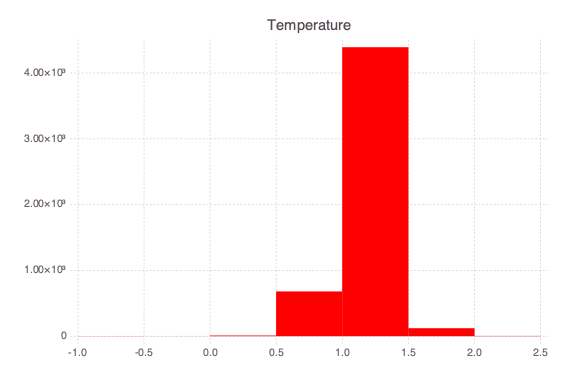

┌ Info: Temperature: log10-transformed
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:51


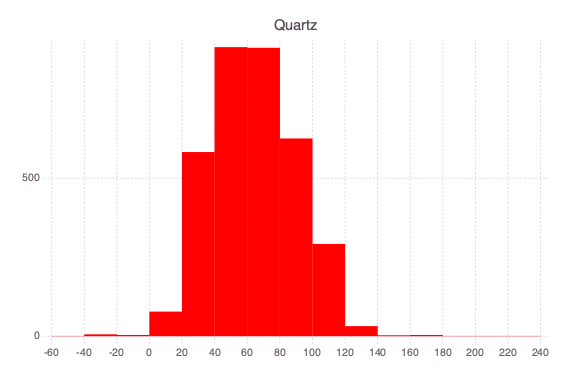

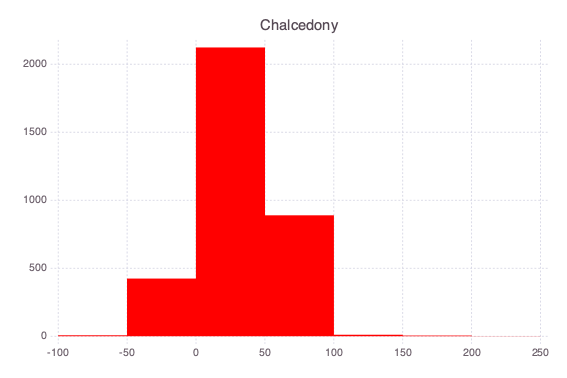

Temperature: Min -1.0 Max 2.4166405 StdDev 0.19028741 Skewness -0.5570712 Count 5214
Quartz: Min -50.870045 Max 222.28357 StdDev 26.329222 Skewness 0.24256101 Count 3460


┌ Info: Quartz
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:54
┌ Info: Chalcedony
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:54


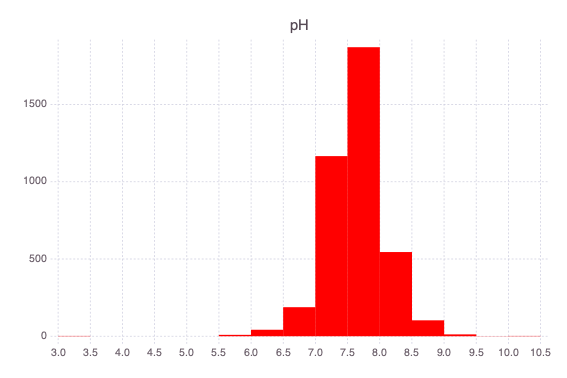

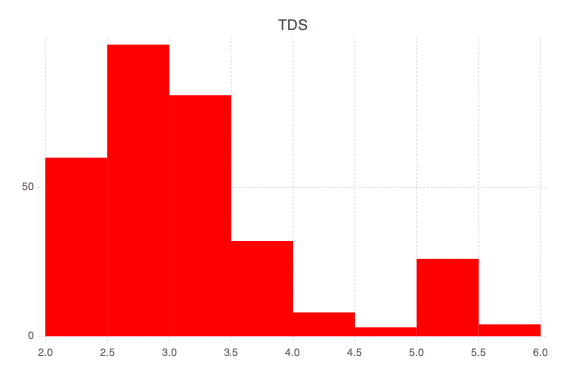

Chalcedony: Min -81.64773 Max 208.67426 StdDev 27.450817 Skewness 0.3369881 Count 3460
pH: Min 3.4 Max 10.2 StdDev 0.44822767 Skewness -0.45681924 Count 3941


┌ Info: pH
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:54
┌ Info: TDS: log10-transformed
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:51


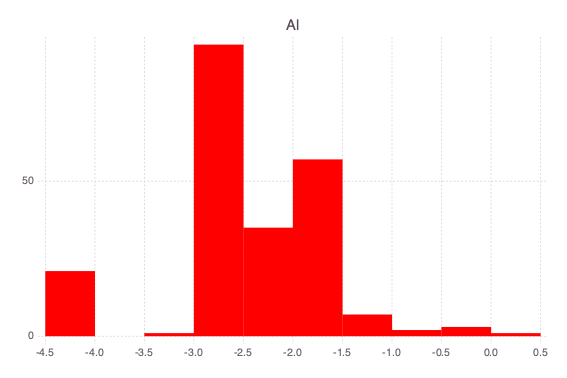

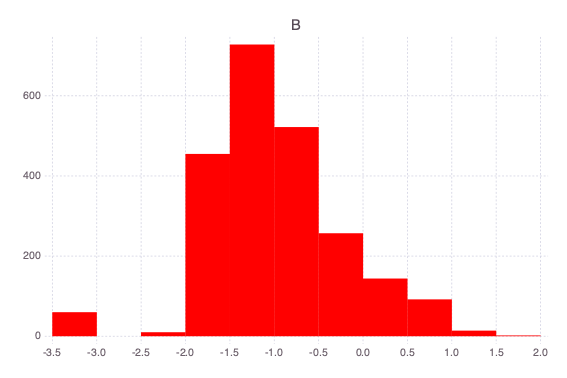

TDS: Min 2.0863597 Max 5.5171957 StdDev 0.8672777 Skewness 1.4807001 Count 312
Al: Min -4.3979397 Max 0.09725732 StdDev 0.8454361 Skewness -0.37494856 Count 221


┌ Info: Al: log10-transformed
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:51
┌ Info: B: log10-transformed
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:51


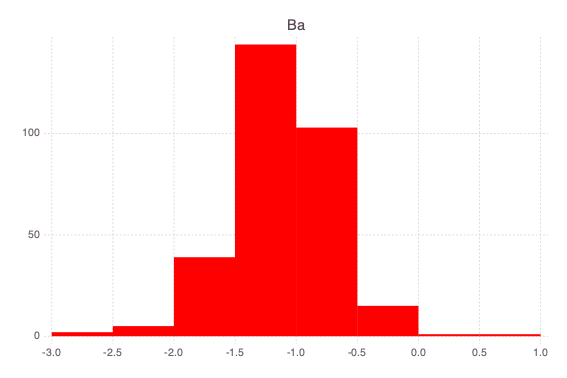

B: Min -3.30103 Max 1.8836614 StdDev 0.77384454 Skewness 0.08153698 Count 2284


┌ Info: Ba: log10-transformed
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:51


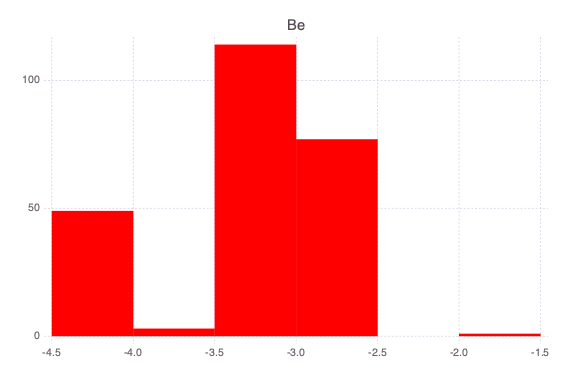

Ba: Min -2.69897 Max 0.6532125 StdDev 0.40884706 Skewness -0.013896148 Count 310


┌ Info: Be: log10-transformed
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:51


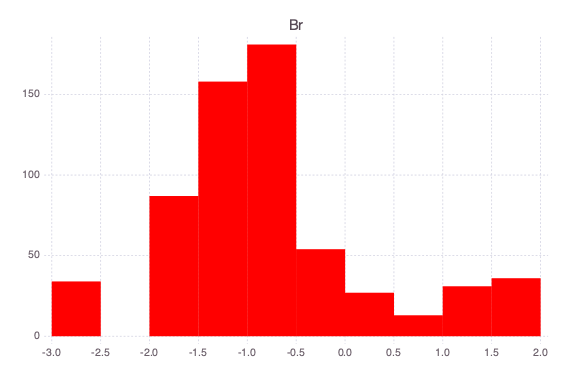

Be: Min -4.273001 Max -1.8860567 StdDev 0.46150032 Skewness -0.83869493 Count 244


┌ Info: Br: log10-transformed
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:51


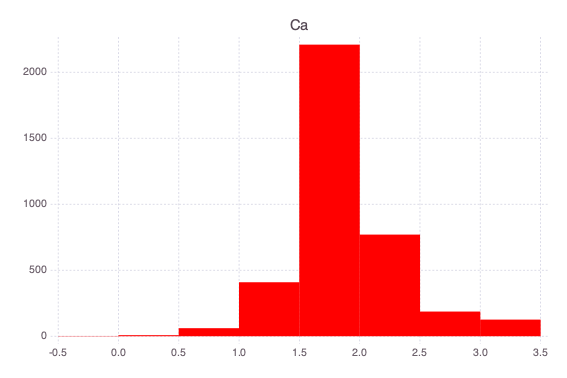

Br: Min -3.0 Max 1.9242793 StdDev 1.0616237 Skewness 0.5956521 Count 621


┌ Info: Ca: log10-transformed
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:51


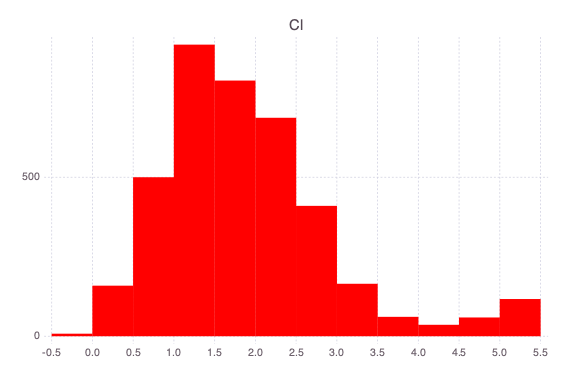

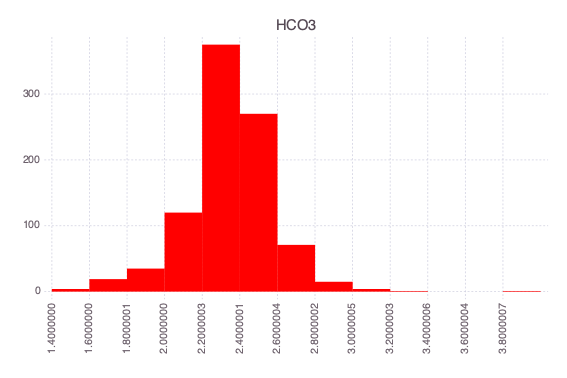

Ca: Min -0.22184873 Max 3.4093695 StdDev 0.43120933 Skewness 0.5738154 Count 3772
Cl: Min -0.22184873 Max 5.3802114 StdDev 1.0519629 Skewness 1.1927316 Count 3923


┌ Info: Cl: log10-transformed
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:51
┌ Info: HCO3: log10-transformed
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:51


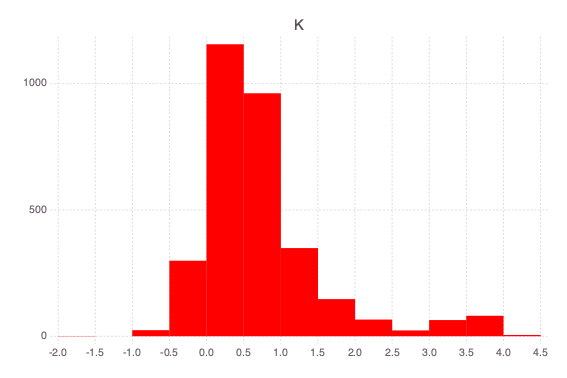

HCO3: Min 1.5682018 Max 3.9645896 StdDev 0.22752158 Skewness 0.051133487 Count 915


┌ Info: K: log10-transformed
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:51


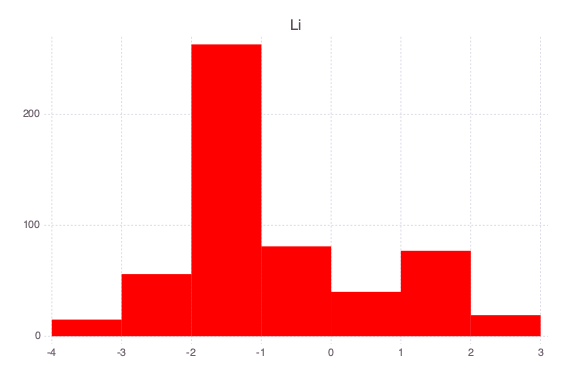

K: Min -2.0 Max 4.1139436 StdDev 0.8480291 Skewness 1.8444492 Count 3177


┌ Info: Li: log10-transformed
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:51


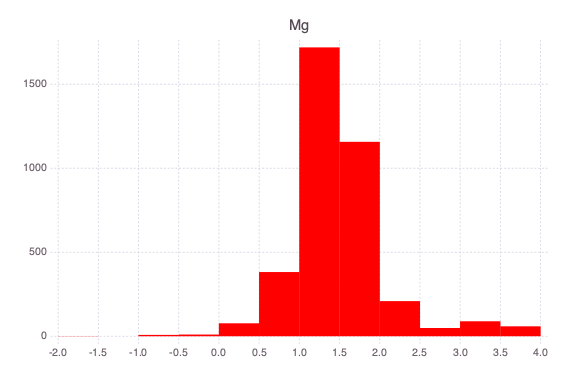

Li: Min -3.9586072 Max 2.9867718 StdDev 1.4681796 Skewness 0.6889145 Count 551


┌ Info: Mg: log10-transformed
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:51


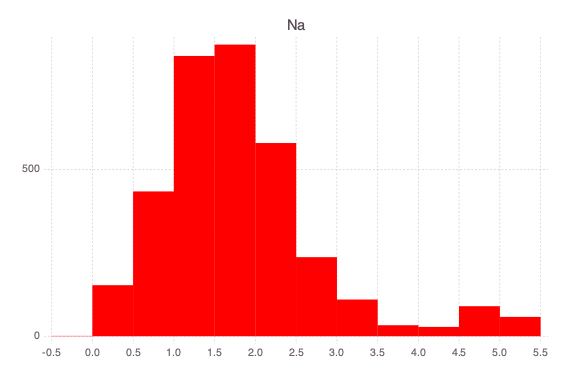

Mg: Min -2.0 Max 3.929419 StdDev 0.5826601 Skewness 1.142913 Count 3760


┌ Info: Na: log10-transformed
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:51


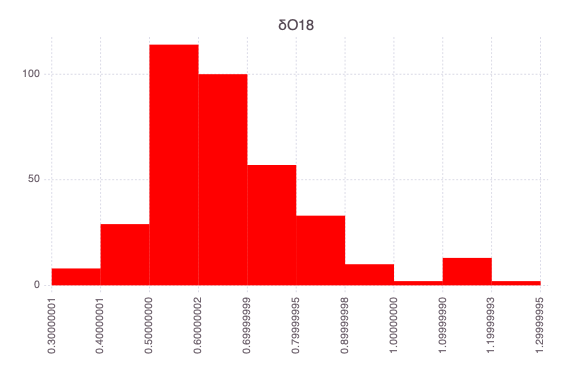

Na: Min -0.30103 Max 5.20412 StdDev 0.985548 Skewness 1.3556563 Count 3437
δO18: Min 0.33243838 Max 1.2137833 StdDev 0.16311567 Skewness 1.1355046 Count 368
Name Min Max StdDev Count (non-NaN's)
Temperature -1.0 2.4166405 0.19028741 -0.5570712 5214
Quartz -50.870045 222.28357 26.329222 0.24256101 3460
Chalcedony -81.64773 208.67426 27.450817 0.3369881 3460
pH 3.4 10.2 0.44822767 -0.45681924 3941
TDS 2.0863597 5.5171957 0.8672777 1.4807001 312
Al -4.3979397 0.09725732 0.8454361 -0.37494856 221
B -3.30103 1.8836614 0.77384454 0.08153698 2284
Ba -2.69897 0.6532125 0.40884706 -0.013896148 310
Be -4.273001 -1.8860567 0.46150032 -0.83869493 244
Br -3.0 1.9242793 1.0616237 0.5956521 621
Ca -0.22184873 3.4093695 0.43120933 0.5738154 3772
Cl -0.22184873 5.3802114 1.0519629 1.1927316 3923
HCO3 1.5682018 3.9645896 0.22752158 0.051133487 915
K -2.0 4.1139436 0.8480291 1.8444492 3177
Li -3.9586072 2.9867718 1.4681796 0.6889145 551
Mg -2.0 3.929419 0.5826601 1.142913 3760
Na -0.30103 5.20412 0.98554

┌ Info: δO18: log10-transformed
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:51
┌ Info: Attributes
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPreprocess.jl:70


In [41]:
NMFk.datanalytics(X, attributes; dims=2, logv=logv);

### normalize the data

In [42]:
Xnl, xlmin, xlmax, zflag = NMFk.normalizematrix_col(X; logv=logv);

### define number of signature to be run
- show directory where outputs should be stored
- define number of iterations

In [43]:
nkrange = 2:10;
resultdir = "results";
nruns = 100;

### run NMFk on normalized data

In [63]:
W, H, fitquality, robustness, aic = NMFk.execute(Xnl, nkrange, nruns; cutoff=0.4, resultdir=resultdir, casefilename="nmfk-nl", load=true)
W, H, fitquality, robustness, aic = NMFk.load(nkrange, nruns; cutoff=0.4, resultdir=resultdir, casefilename="nmfk-nl");

Signals:  2 Fit:      186.979 Silhouette:    0.5600511 AIC:    -193490.6 Signal order: [1, 2]
Signals:  3 Fit:     116.1197 Silhouette:    0.3400365 AIC:    -202059.3 Signal order: [1, 2, 3]
Signals:  4 Fit:     81.67226 Silhouette: -0.004722083 AIC:      -205653 Signal order: [1, 2, 3, 4]
Signals:  5 Fit:     55.85581 Silhouette:   0.03561851 AIC:    -210367.2 Signal order: [1, 2, 3, 4, 5]
Signals:  6 Fit:     37.37445 Silhouette:   0.08498218 AIC:    -215954.6 Signal order: [1, 2, 3, 4, 5, 6]
Signals:  7 Fit:     22.77074 Silhouette:  -0.06623857 AIC:    -225288.2 Signal order: [1, 2, 3, 4, 5, 6, 7]
Signals:  8 Fit:     14.94362 Silhouette:    0.0637157 AIC:    -231651.2 Signal order: [1, 2, 3, 4, 5, 6, 7, 8]
Signals:  9 Fit:     9.241436 Silhouette:   -0.1125796 AIC:    -240388.3 Signal order: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Signals: 10 Fit:     6.104004 Silhouette:  -0.01305462 AIC:      -246494 Signal order: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Signals:  2 Fit:      186.979 Silhouette:    

┌ Info: Results
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkExecute.jl:15
┌ Info: Optimal solution: 2 signals
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkExecute.jl:23


Signals: 10 Fit:     6.104004 Silhouette:  -0.01305462 AIC:      -246494 Signal order: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


┌ Info: Optimal solution: 2 signals
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkIO.jl:30


In [64]:
NMFk.getks(nkrange, robustness[nkrange], 0.3)

2-element Vector{Int64}:
 2
 3

### create plots

In [47]:
resultdirpost = "results-postprocessing-nl-$(nruns)"
figuredirpost = "figures-postprocessing-nl-$(nruns)";

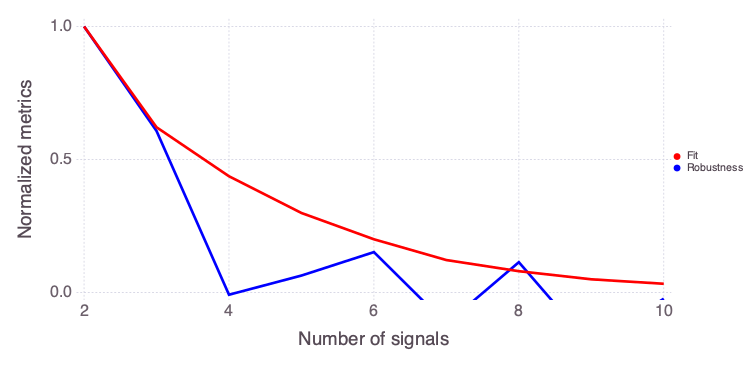

┌ Info: Make dir figures-postprocessing-nl-100
└ @ Mads /Users/bulbulahmmed/.julia/packages/Mads/mu0UL/src/MadsIO.jl:1391


In [48]:
NMFk.plot_feature_selecton(nkrange, fitquality, robustness; figuredir=figuredirpost)

### Signature plot

┌ Info: Number of signals: 3
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPostprocess.jl:205
┌ Info: Attributes (signals=3)
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPostprocess.jl:209
┌ Warning: File results-postprocessing-nl-100/Hmatrix-3-3_18-1000.jld does not exist! Robust k-means analysis will be executed ...
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkCluster.jl:74
┌ Info: Robust k-means analysis results are saved in file results-postprocessing-nl-100/Hmatrix-3-3_18-1000.jld!
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkCluster.jl:100
┌ Warning: Procedure to find unique signals could not identify a solution ...
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkCluster.jl:158
┌ Warning: Procedure to find unique signals could not identify a solution ...
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkCluster.jl:158
┌ Warning: Procedure to find unique signals could not ident

6×2 Matrix{Any}:
 "pH"           1.0
 "Temperature"  0.858848
 "Ba"           0.84477
 "Mg"           0.788068
 "Ca"           0.76783
 "HCO3"         0.549396

9×2 Matrix{Any}:
 "δO18"        1.0
 "Cl"          0.651079
 "Na"          0.643991
 "Br"          0.642053
 "Quartz"      0.620207
 "Chalcedony"  0.596872
 "B"           0.586983
 "K"           0.475275
 "Li"          0.414782

3×2 Matrix{Any}:
 "Be"   1.0
 "Al"   0.672723
 "TDS"  0.332944

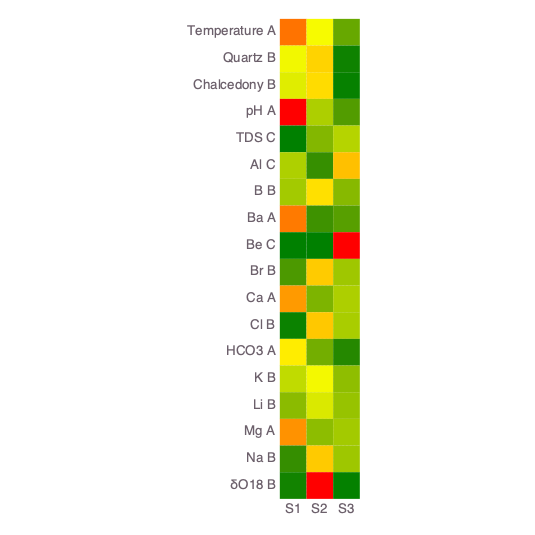

┌ Info: Robust k-means analysis results are saved in file results-postprocessing-nl-100/Wmatrix-3-3_5218-1000.jld!
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkCluster.jl:100
┌ Warning: Procedure to find unique signals could not identify a solution ...
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkCluster.jl:158
┌ Warning: Procedure to find unique signals could not identify a solution ...
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkCluster.jl:158
┌ Warning: Procedure to find unique signals could not identify a solution ...
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkCluster.jl:158
┌ Info: Signal B -> A Count: 6
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPostprocess.jl:316
┌ Info: Signal A -> B Count: 9
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPostprocess.jl:316
┌ Info: Signal C -> C Count: 3
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPostprocess.

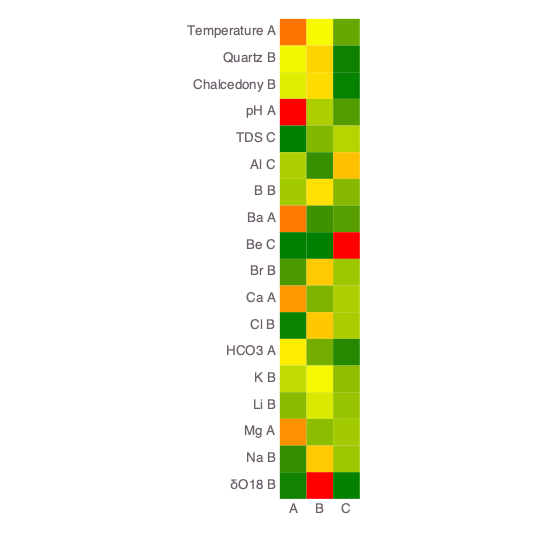

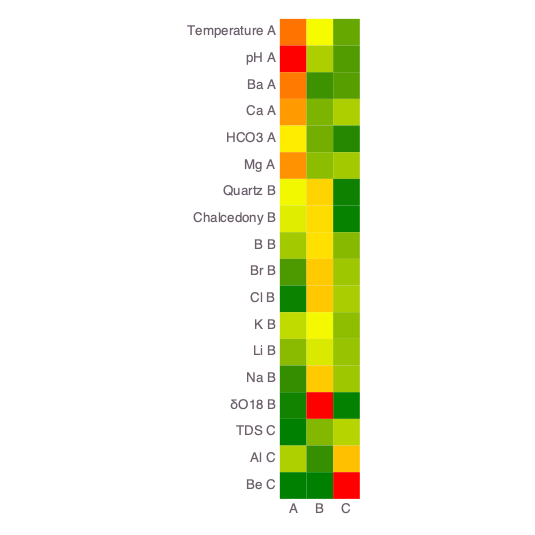

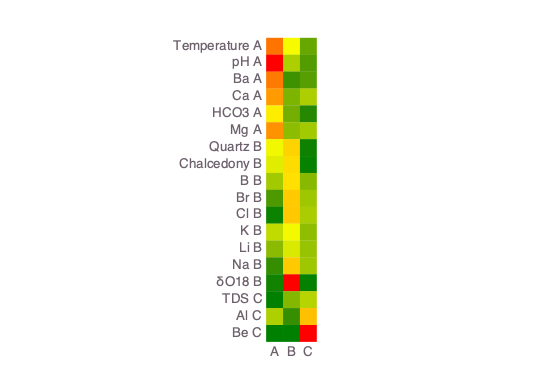

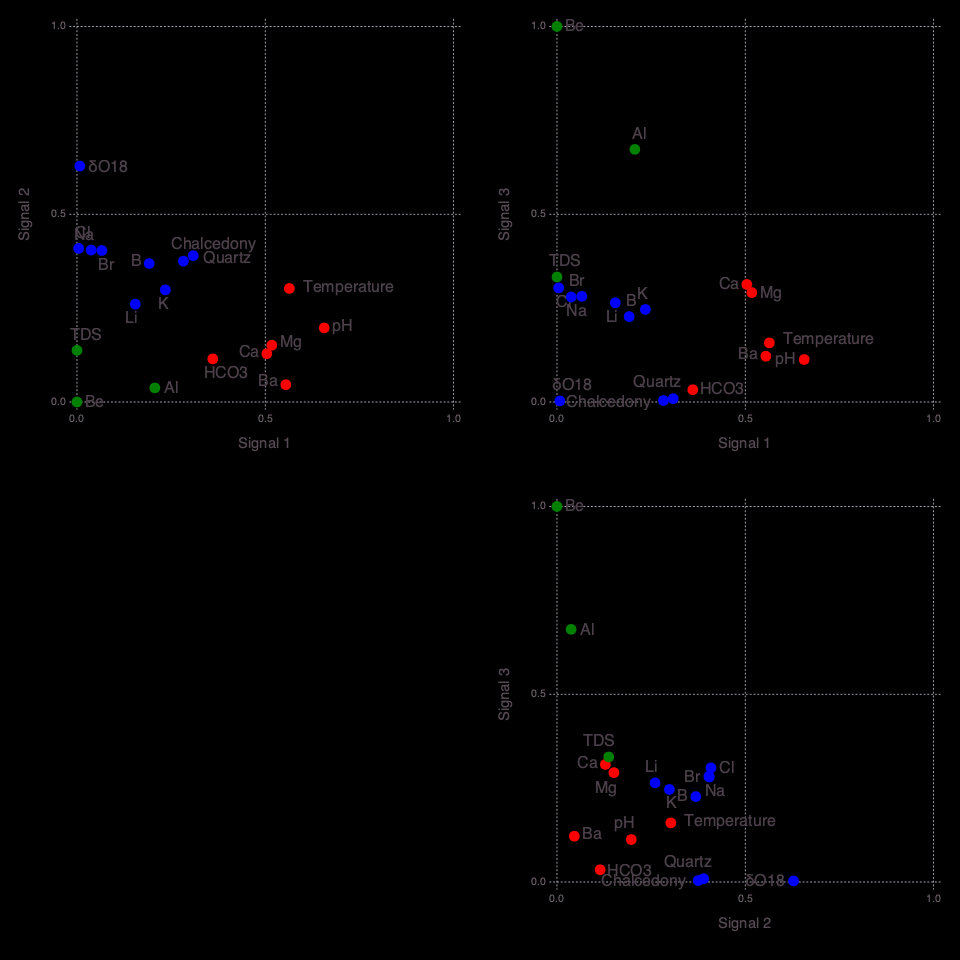

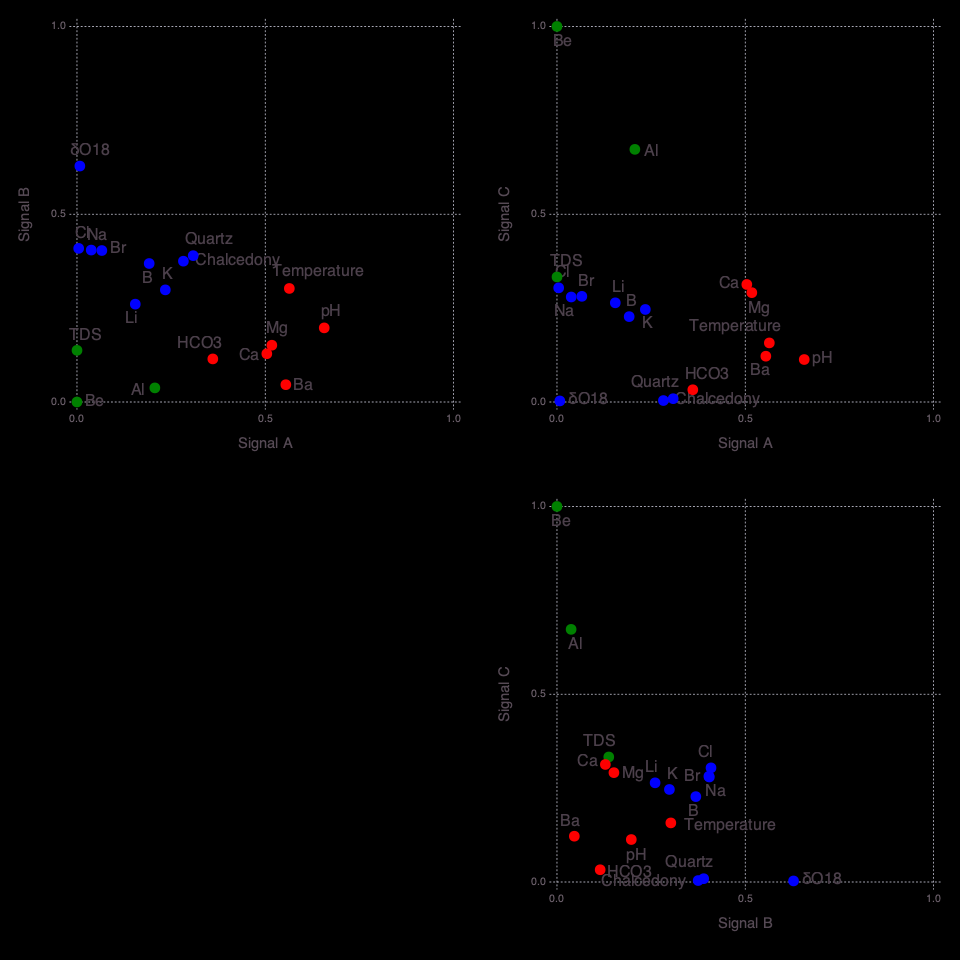

2131×2 Matrix{Any}:
 "4816"  1.0
 "4655"  0.970208
 "4826"  0.958804
 "2260"  0.955817
 "4015"  0.938536
 "3257"  0.93743
 "4889"  0.929527
 "1797"  0.924136
 "3405"  0.924069
 "2566"  0.905143
 "4527"  0.902756
 "3456"  0.89687
 "2086"  0.896257
 ⋮       
 "168"   0.495597
 "279"   0.494278
 "1403"  0.493987
 "350"   0.492666
 "341"   0.491852
 "2730"  0.487104
 "3987"  0.47064
 "483"   0.466211
 "2909"  0.464978
 "476"   0.46367
 "2931"  0.435235
 "452"   0.359449

1966×2 Matrix{Any}:
 "4430"  1.0
 "2992"  0.972819
 "2309"  0.920633
 "4913"  0.90427
 "4056"  0.88218
 "564"   0.868838
 "4978"  0.866204
 "4319"  0.857647
 "4788"  0.855117
 "2468"  0.831267
 "4047"  0.831216
 "4033"  0.830649
 "4580"  0.826985
 ⋮       
 "2828"  0.209591
 "2292"  0.208768
 "2553"  0.205504
 "375"   0.203084
 "159"   0.202853
 "3798"  0.198906
 "5112"  0.1978
 "738"   0.19415
 "3317"  0.193811
 "747"   0.189873
 "10"    0.181605
 "4954"  0.163099

1121×2 Matrix{Any}:
 "5013"  1.0
 "5118"  0.985958
 "5064"  0.978501
 "5068"  0.974911
 "5126"  0.969774
 "2554"  0.952582
 "5049"  0.948387
 "5048"  0.914722
 "5006"  0.910949
 "5095"  0.910366
 "5120"  0.904626
 "2414"  0.89944
 "5088"  0.893348
 ⋮       
 "2431"  0.176362
 "3688"  0.176228
 "598"   0.175635
 "4154"  0.174466
 "4710"  0.174457
 "3376"  0.172963
 "1412"  0.170218
 "3662"  0.161509
 "4300"  0.160252
 "2742"  0.148677
 "4289"  0.144853
 "2028"  0.129906

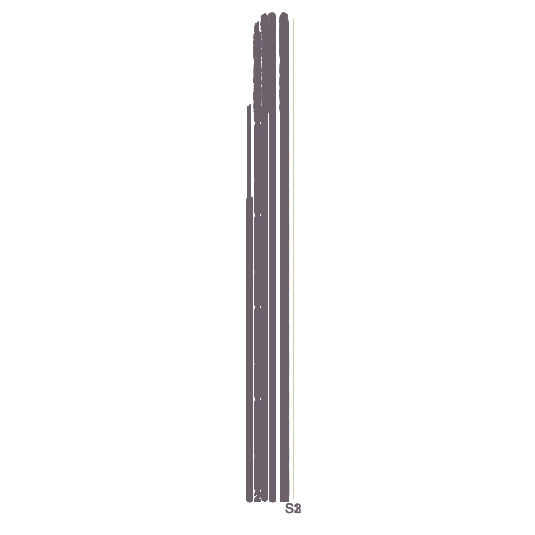

┌ Info: Locations (signals=3)
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPostprocess.jl:391
┌ Info: Signal A (S1) Count: 2131
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPostprocess.jl:404
┌ Info: Signal B (S2) Count: 1966
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPostprocess.jl:404
┌ Info: Signal C (S3) Count: 1121
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPostprocess.jl:404
┌ Info: Signal A -> A Count: 2131
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPostprocess.jl:414
┌ Info: Signal B -> B Count: 1966
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPostprocess.jl:414
┌ Info: Signal C -> C Count: 1121
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPostprocess.jl:414
┌ Info: Signal A (remapped k-means clustering)
└ @ NMFk /Users/bulbulahmmed/.julia/packages/NMFk/8O7FO/src/NMFkPostprocess.jl:429
┌ Info: Signal B (remapped k-means clustering)
└ @ NMFk

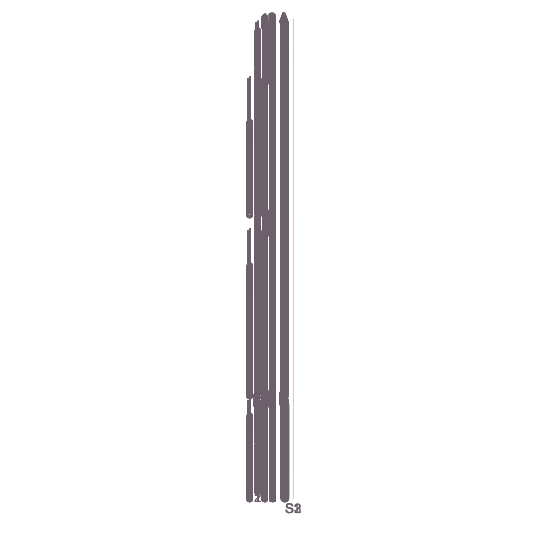

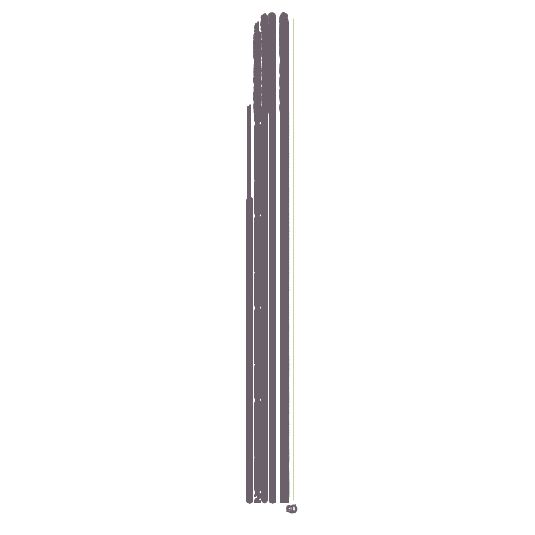

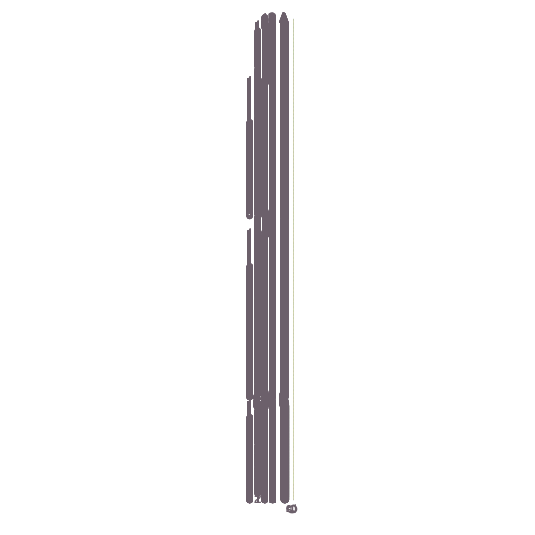

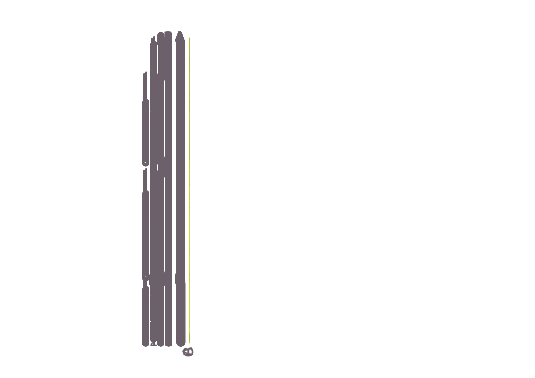

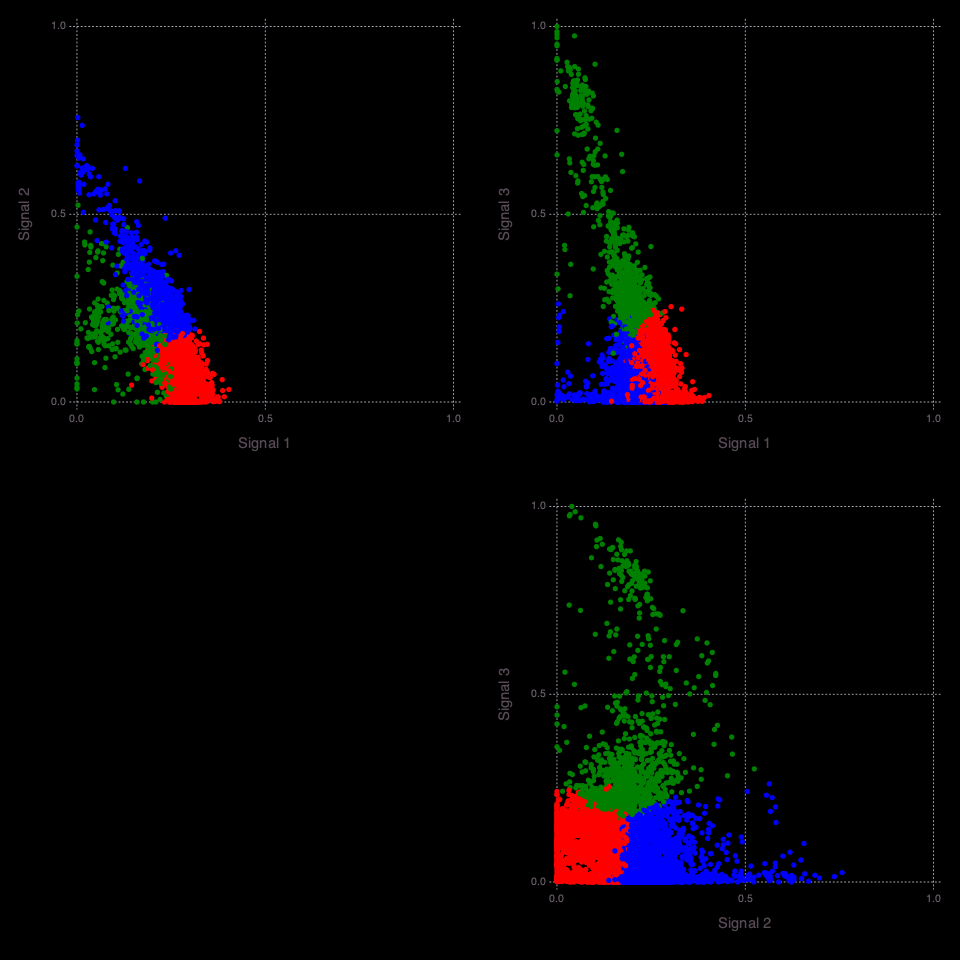

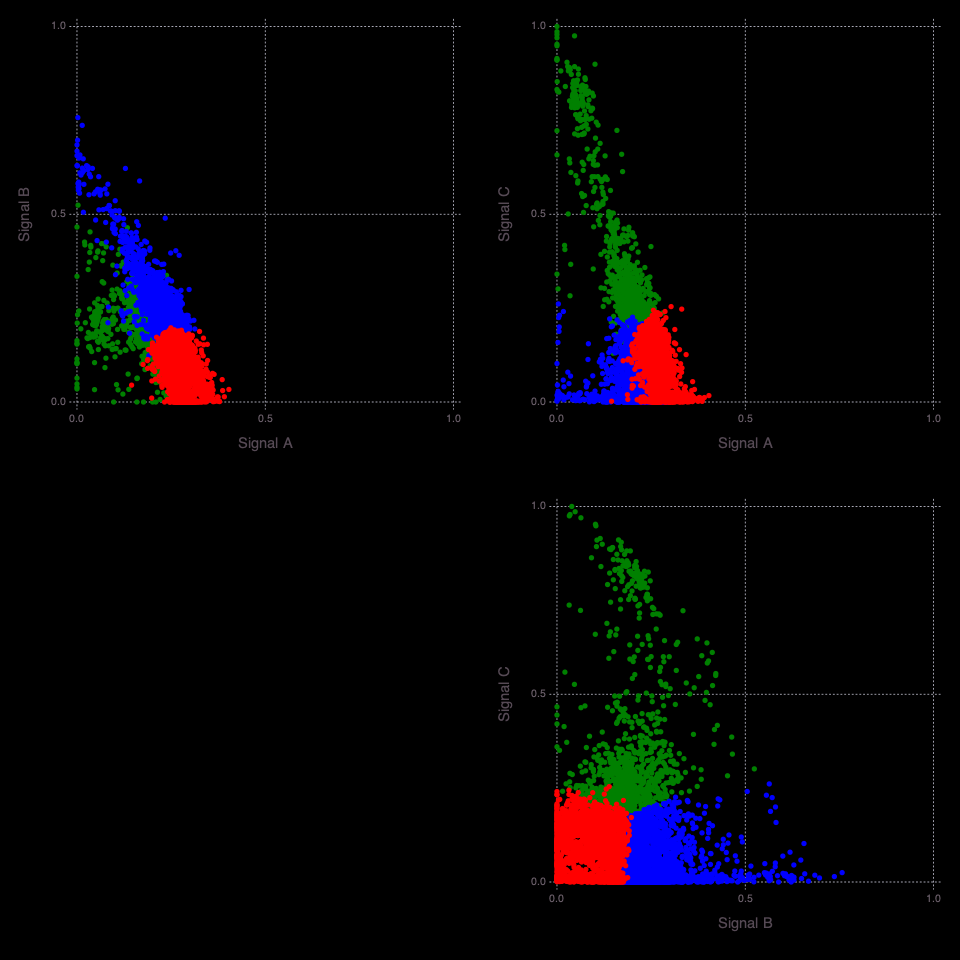

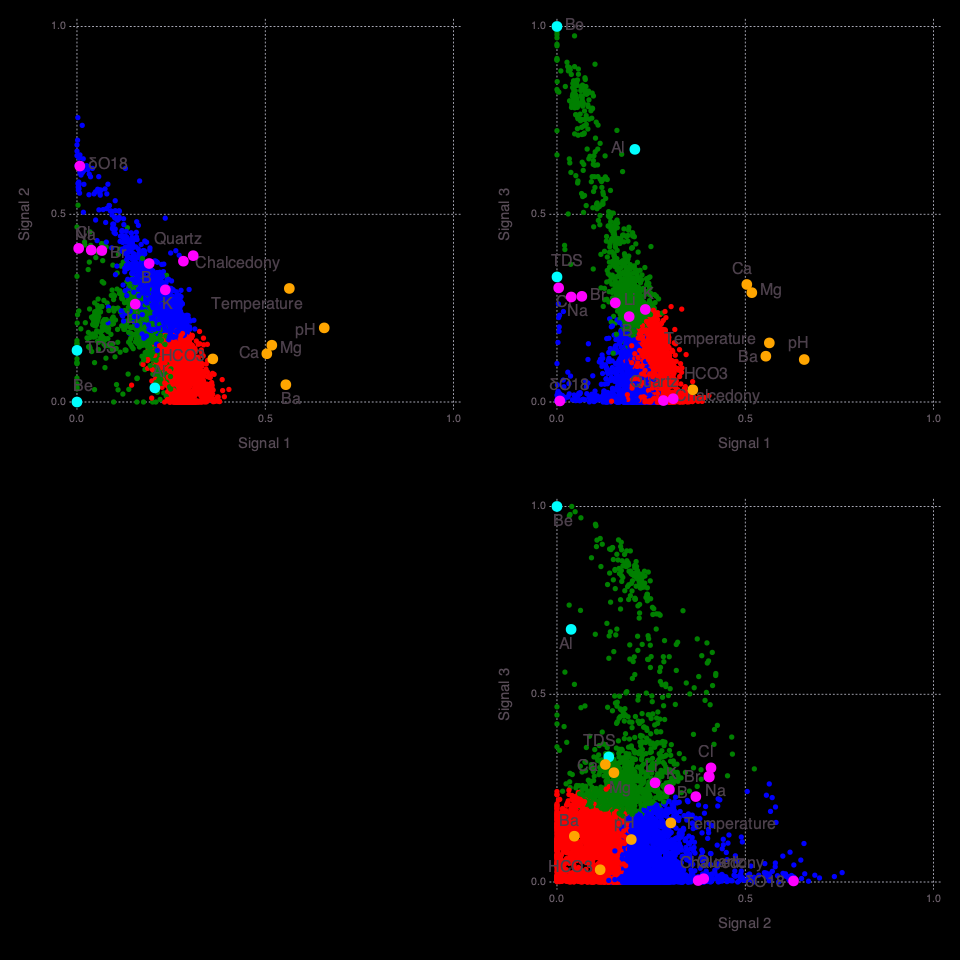

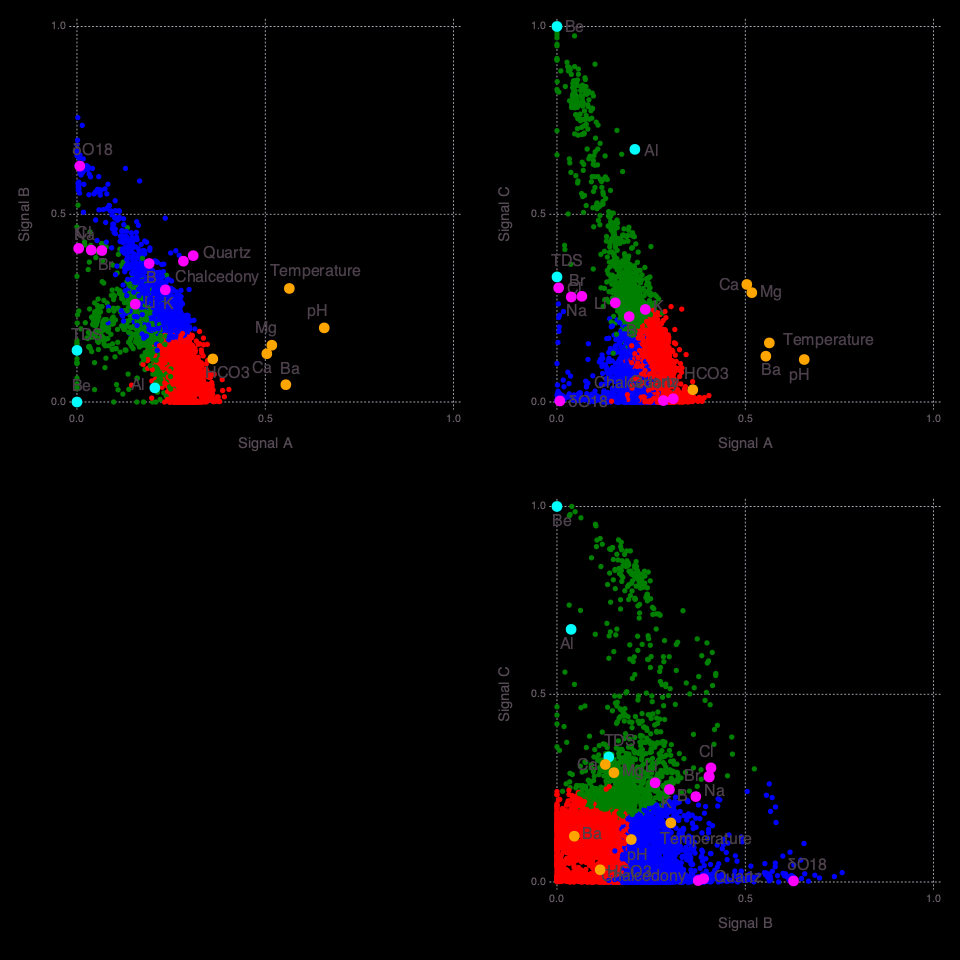

([[1, 2, 3]], [['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B'  …  'A', 'B', 'B', 'B', 'A', 'B', 'B', 'A', 'A', 'A']], [['A', 'B', 'B', 'A', 'C', 'C', 'B', 'A', 'C', 'B', 'A', 'B', 'A', 'B', 'B', 'A', 'B', 'B']])

In [53]:
Sorder, Wclusters, Hclusters = NMFk.clusterresults(NMFk.getk(nkrange, robustness[nkrange], 0.3), W, H, string.(collect(1:npoints)), attributes; lon=xcoord, lat=ycoord, resultdir=resultdirpost, figuredir=figuredirpost, ordersignal=:Wcount, Hcasefilename="attributes", Wcasefilename="locations", biplotcolor=:WH, sortmag=false, biplotlabel=:H, point_size_nolabel=2Gadfly.pt, point_size_label=4Gadfly.pt)

In [54]:
Mads.display("results-postprocessing-nl-100/attributes-3-groups.txt")

Signal A (S1)
pH         	1.0
Temperature	0.859
Ba         	0.845
Mg         	0.788
Ca         	0.768
HCO3       	0.549

Signal B (S2)
δO18       	1.0
Cl         	0.651
Na         	0.644
Br         	0.642
Quartz     	0.62
Chalcedony 	0.597
B          	0.587
K          	0.475
Li         	0.415

Signal C (S3)
Be         	1.0
Al         	0.673
TDS        	0.333



In [60]:
locations, lhs = DelimitedFiles.readdlm("results-postprocessing-nl-100/locations-3.csv", ',', header=true)
clusters = sort(unique(locations[:,end]))
for i=1:size(clusters,1)
	locations[locations .== clusters[i]] .= Integer(i)
end
locations = convert.(Float32, locations)

5218×7 Matrix{Float32}:
    1.0  -111.06   39.4341  0.6627    0.0234368    0.124347    1.0
    2.0  -111.066  39.4233  0.670377  0.0287214    0.14722     1.0
    3.0  -111.053  39.4658  0.615474  8.88704f-7   0.203825    1.0
    4.0  -111.07   39.4286  0.669782  0.0108548    0.0435491   1.0
    5.0  -111.112  39.3211  0.640001  0.152409     0.00993296  1.0
    6.0  -111.056  39.4947  0.763099  5.00038f-5   0.0934381   1.0
    7.0  -111.056  39.4947  0.760624  0.0          0.0882335   1.0
    8.0  -111.057  39.4947  0.69465   0.0          0.175217    1.0
    9.0  -111.116  39.328   0.855406  0.0417626    0.00724127  1.0
   10.0  -111.113  39.3455  0.528689  0.181605     0.00429201  2.0
   11.0  -111.122  39.3202  0.847956  0.000684411  0.0172912   1.0
   12.0  -111.122  39.3194  0.615728  0.0894798    0.232601    3.0
   13.0  -111.124  39.3216  0.639113  0.0653132    0.215153    1.0
    ⋮                                              ⋮           
 5207.0  -113.893  41.6683  0.366776  0.4

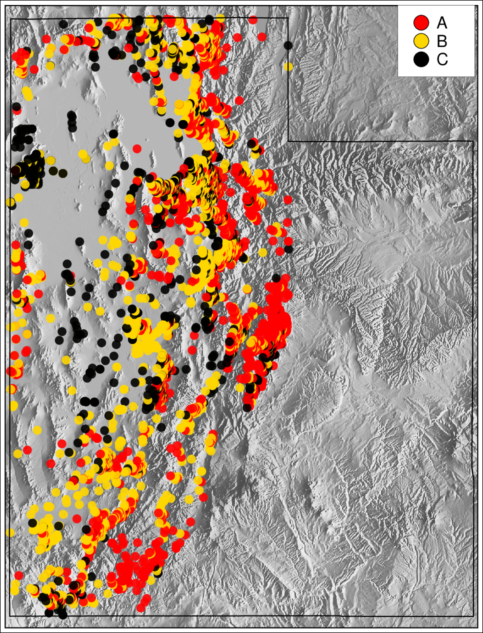

┌ Warning: In Jupyter you can only visualize png files. File maps/signatures-3.png was saved in disk though.
└ @ GMT /Users/bulbulahmmed/.julia/packages/GMT/Yrxaq/src/common_options.jl:3256


In [77]:
# Signatures
GMT.grdimage("maps/utah.nc", shade=(azimuth=100, norm="e0.8"), proj=:Mercator, color=GMT.makecpt(color=:grayC, transparency=10, range=(0,5000,500), continuous=true),
figsize=8, conf=(MAP_FRAME_TYPE="plain", MAP_GRID_PEN_PRIMARY="thinnest,gray,.", MAP_GRID_CROSS_SIZE_SECONDARY=0.1, MAP_FRAME_PEN=0.5, MAP_TICK_PEN_PRIMARY=0.1, MAP_TICK_LENGTH_PRIMARY=0.01, FORMAT_GEO_MAP="ddd", FONT_ANNOT_PRIMARY=0.1, FONT_ANNOT_SECONDARY=0.1), frame=(axis="lrtb"))
GMT.legend!(box=(pen=false, fill=:white),
            pos=(inside=true, anchor=:T, width=1.30, justify=:CM, offset=(-0.7, -0.6)),
            GMT.text_record([
                        "S 0.10i c 0.10i  red 0.25p 0.2i A"
                        "S 0.10i c 0.10i  gold 0.25p 0.2i B"
                        "S 0.10i c 0.10i  black 0.25p 0.2i C"]),
            par=(:FONT_ANNOT_PRIMARY, "8p,Arial"))
GMT.scatter!(locations[:,2], locations[:,3], marker=:c, markersize=:0.15, color=(:red, :gold, :black), zcolor=locations[:,end], alpha=10, coast=(proj=:Mercator, 
    DCW=(country="US.UT", pen=(0.5,:black))),fmt=:png, savefig="maps/signatures-3", show=true)
Mads.display("maps/signatures-3.png")